<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [2]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


#Data Understanding

In [3]:
# Structure of the DataFrame.
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [4]:
# Variable information including type, and non-null counts.
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


In [5]:
# Columns listed.
boston_df.columns

Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

In [6]:
# Drop the first column 'Unnamed: 0'
boston_df.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
# Dimension of DataFrame.
boston_df.shape

(506, 13)

In [8]:
# Descriptive statistics for each column, including measures of central tendancy and standard deviation.
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


#Descriptive Statistics and Visualizations

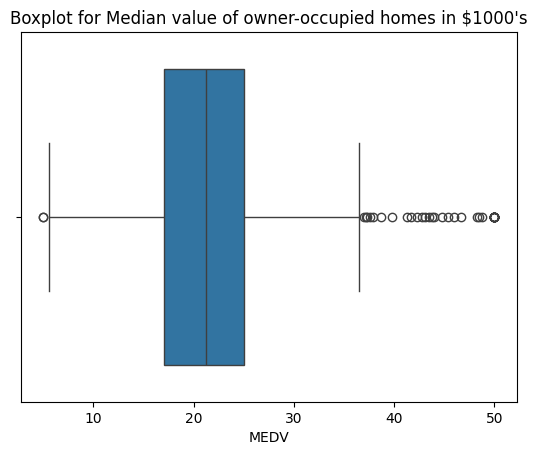

In [9]:
# For the "Median value of owner-occupied homes" provide a boxplot
sns.boxplot(x=boston_df['MEDV'])
plt.title("Boxplot for Median value of owner-occupied homes in $1000's")
plt.show()

1. Outliers found mostly after MEDV value of 37.
2. 50% of the entries have MEDV between 15 and 25, as observed in the box area between 25th and 75th percentile.


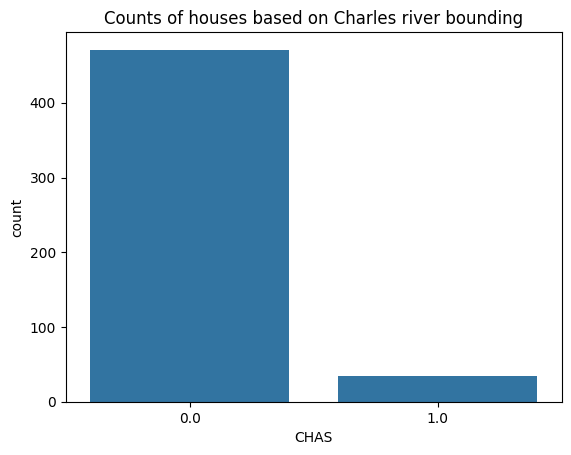

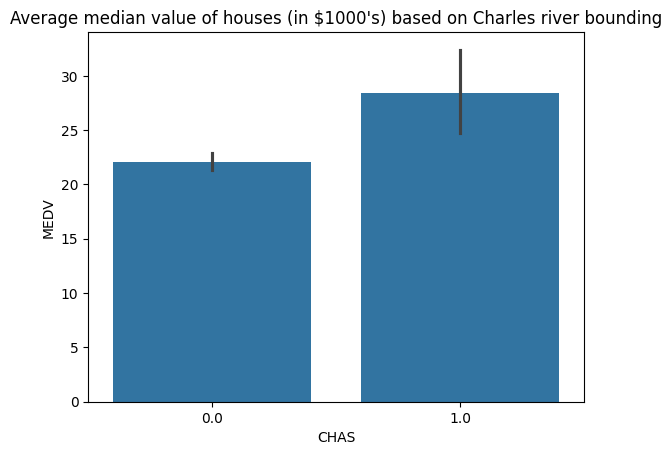

In [10]:
# Provide a bar plot for the Charles river variable

# Count plot based on entries bound by Charles river
sns.countplot(x="CHAS", data=boston_df)
plt.title("Counts of houses based on Charles river bounding")
plt.show()

# Average median value of houses based on Charles river bounding
sns.barplot(x="CHAS", y='MEDV', data=boston_df)
plt.title("Average median value of houses (in $1000's) based on Charles river bounding")
plt.show()

1. Houses bound by Charles river have a higher average median value.
2. Majority of the houses  are not bound by Charles river.

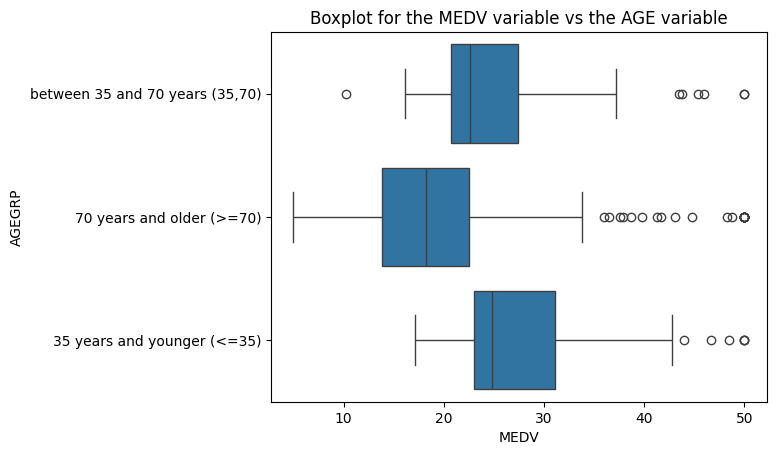

In [11]:
# Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older
boston_df.loc[(boston_df["AGE"] <= 35),'AGEGRP'] = '35 years and younger (<=35)'
boston_df.loc[(boston_df["AGE"] > 35) & (boston_df["AGE"]<70),'AGEGRP'] = 'between 35 and 70 years (35,70)'
boston_df.loc[(boston_df["AGE"] >= 70),'AGEGRP'] = '70 years and older (>=70)'

# Provide a boxplot for the MEDV variable vs the AGE variable.
sns.boxplot(x='MEDV', y='AGEGRP', data=boston_df)
plt.title("Boxplot for the MEDV variable vs the AGE variable")
plt.show()

1. Older homes (>=70) have cheaper median values, but with multiple outliers.
2. Newer homes(<=35) have comparitively priced at higher ends.

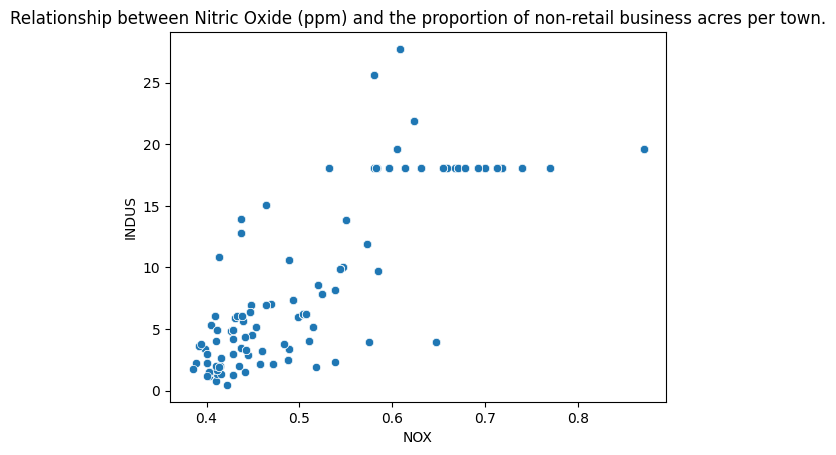

In [12]:
# Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.
sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
plt.title("Relationship between Nitric Oxide (ppm) and the proportion of non-retail business acres per town.")
plt.show()

1. Until a NO 0.6 ppm, a linear relationship is found.
2. Proportions of non-retail business acres have not increased post this, and have mostly remained stagnant may be due to hazard.

<ipython-input-13-9b4634899948>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=boston_df['PTRATIO'], kde=False)


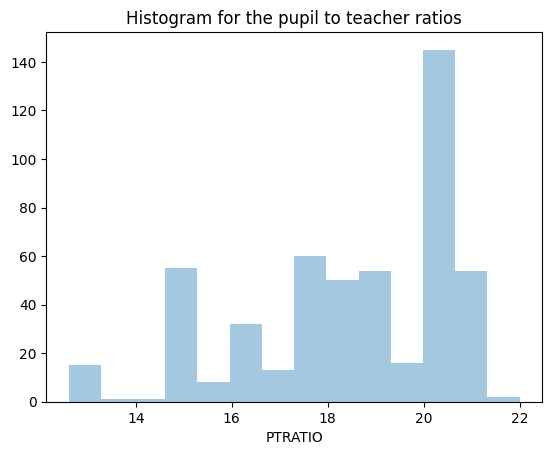

In [13]:
# Create a histogram for the pupil to teacher ratio variable
sns.distplot(a=boston_df['PTRATIO'], kde=False)
plt.title("Histogram for the pupil to teacher ratios")
plt.show()

1. Pupil-Teacher ratio is highest at 20-21 range.

#Hypothesis Testing and Correlations

In [14]:
# Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
MEDV_notBound=boston_df[boston_df["CHAS"] == 0]["MEDV"]
MEDV_Bound=boston_df[boston_df["CHAS"] == 1]["MEDV"]
scipy.stats.ttest_ind(MEDV_notBound, MEDV_Bound, axis=0, equal_var=True)

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

Null Hypothesis (H0): There is no significant difference between the mean MEDV based on Charles river bounding. i.e., the means are the same.<br>
Alternative Hypothesis (H1): There is a significant difference between the mean MEDV based on Charles river bounding, i.e., the means are not the same. <br><br>
H0 can be rejected since the pvalue 0.0000739 << alpha 0.05. So, there is a significant difference between the mean MEDV based on Charles river bounding

In [15]:
# Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
MEDV_lowerAge = boston_df[boston_df["AGEGRP"] == '35 years and younger (<=35)']["MEDV"]
MEDV_midAge = boston_df[boston_df["AGEGRP"] == 'between 35 and 70 years (35,70)']["MEDV"]
MEDV_higherAge = boston_df[boston_df["AGEGRP"] == '70 years and older (>=70)']["MEDV"]

f_stats, p_value = scipy.stats.f_oneway(MEDV_lowerAge, MEDV_midAge, MEDV_higherAge, axis=0)
print("F-Statistic: ", f_stats)
print("P-Value: ", p_value)

F-Statistic:  36.40764999196599
P-Value:  1.7105011022702984e-15


Null Hypothesis (H0): The mean MEDVs of all 3 house age groups have no significant difference between them.<br>
Alternative Hypothesis (H1): At least on of the 3 mean MEDVs significantly differ, from the other mean MEDVs.<br><br>
H0 can be rejected since the pvalue 0.00000000000000171 << alpha 0.05. So, there is a significant difference between the mean MEDV based on proportion of units build priour to 1940.

In [16]:
# Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
pearson, p_value = scipy.stats.pearsonr(boston_df["NOX"], boston_df["INDUS"])
print("Pearson Coefficient value: ", pearson)
print("P-value: ", p_value)

Pearson Coefficient value:  0.7636514469209151
P-value:  7.913361061239527e-98


Null Hypothesis (H0): There is no correlation/association between NO (ppm) concentration and the proportion of non-retail business acres per town. <br>
Alternative Hypothesis (H1): There is a/an correlation/association between NO (ppm) concentration and the proportion of non-retail business acres per town.<br><br>
H0 can be rejected since the pvalue 0.000000...791 (with 97 zeroes before the first digit) << alpha 0.05. So, there is does exist relationship between NO concentrations and the proportion of non-retail business acres per town.

In [17]:
# What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
y = boston_df['MEDV']
x = boston_df['DIS']
x = sm.add_constant(x)
regression = sm.OLS(y,x).fit()
regression.summary()

print("Pearsons Coefficient: ", np.sqrt(0.062))

Pearsons Coefficient:  0.24899799195977465


Null Hypothesis (H0): The weighted distances to five Boston employment centres are not related to MEDV. <br>
Alternative Hypothesis (H1): The weighted distances to five Boston employment centres are related to MEDV. <br><br>
The obtained Pearsons Coefficient 0.248 is low, indicating weak correlation between both features. The impact is however, positive.